1. **Tokenization**:
2. **Text Cleaning**:nltk and sklearn
3. **Feature Extraction**: Converting the text data into numerical representations (features) that machine learning models can understand.
   - Bag-of-Words (BoW): Represents text data as a matrix where rows correspond to documents and columns correspond to unique words in the vocabulary.
   - TF-IDF (Term Frequency-Inverse Document Frequency): Computes the importance of words in a document relative to a collection of documents.
   - Word Embeddings: Dense, low-dimensional vector representations of words learned from large text corpora using techniques like Word2Vec, GloVe, or FastText.
   libraries skit-learn
   N GRAMS

4. **Model Building**:Used algorithms include logistic regression. LR1  scikit-learn, TensorFlow, or PyTorch

5. **Model Evaluation**:
6. **Deployment and Integration**
PROBABILISTIC MODEL - NGRAMS

Bag-of-Words (BoW) with Logistic Regression (LR): 88.28% ± 0.93%
TF-IDF with Logistic Regression (LR): 85.24% ± 0.84%
Word Embeddings with Logistic Regression (LR): 85.23% ± 0.6%



In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 200)
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [3]:
# check for missing values
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
# drop the id column
# data.drop(['id'], axis=1, inplace=True)
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [5]:
# Check for the class balance
data['label'].value_counts(normalize=True)

0    0.744192
1    0.255808
Name: label, dtype: float64

<AxesSubplot:>

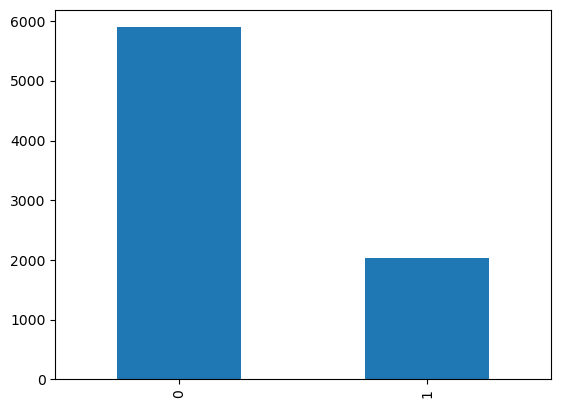

In [6]:
# plot the label counts 
data['label'].value_counts().plot(kind='bar')

2. Data Cleaning


In [7]:
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [8]:
import re
# Substitute 's with " is" 
re.sub(r"'s\b", " is", data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [9]:
# Removing the user mentions
data['tweet'][11]


'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [10]:
# We'll retain on the alphabets & digits
re.sub("@[A-Za-z0-9]+", "", data['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.  really dropped the ball with that design. #drinkyourhaterade'

In [11]:
# remive the hashtags
data['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [12]:
re.sub("#", "", data['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [13]:
# Removing the hyperlinks
re.sub(r"http\S+", "", data['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [14]:
# Retain on the alphabets (get rid of punctuations, special char, digits)
data['tweet'][25]


'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [15]:
re.sub(r"[^a-zA-Z]", " ", data['tweet'][0])

' fingerprint  Pregnancy Test https   goo gl h MfQV  android  apps  beautiful  cute  health  igers  iphoneonly  iphonesia  iphone'

In [16]:
# Stop words Removal
import nltk
from nltk.corpus import stopwords

In [17]:
nltk_stopwords = set(stopwords.words('english'))
print(nltk_stopwords)

{'theirs', 'that', 'am', 'them', 'under', 'where', 'her', 'my', "mustn't", 'own', 'ours', "doesn't", "that'll", 'here', 'same', 'm', 'of', 'too', 'it', 'off', 'by', 'll', 'yourselves', 'him', 'if', 'at', 'she', 'was', "don't", 'ma', "you've", 'down', "weren't", 're', 'because', 'had', 'myself', 'after', 'not', "isn't", 'doing', 'be', 'its', 'until', 'on', 'd', 'didn', 'aren', 'do', 'into', 'about', 't', 'our', 'just', 'with', 'during', "should've", 'some', 'ourselves', 'isn', 'i', "you'd", "it's", 'his', 'are', 'themselves', 'each', 'above', 'been', 'what', 'haven', "hasn't", "won't", 'y', 'but', 'so', 'don', 'weren', 'needn', 'itself', 'than', 'any', 'they', 'being', 'there', 'has', "shan't", 'mightn', 'whom', 'these', 'wouldn', 'those', 'himself', 'their', 'below', 'both', 'who', 'for', 'over', 'few', "you're", 'having', 'mustn', 'between', 'hers', 'further', 'no', "needn't", 'then', 'once', 'while', 'can', "haven't", "couldn't", 'were', 'in', 'such', 'from', 'through', 'the', "you'l

In [18]:
len(nltk_stopwords)

179

In [19]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
sklearn_stopwords = set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'that', 'am', 'whereby', 'noone', 'them', 'become', 'without', 'nevertheless', 'her', 'seem', 'five', 'full', 'call', 'own', 'get', 'became', 'ours', 'anyway', 'fill', 'here', 'system', 'toward', 'within', 'too', 'sometime', 'beforehand', 'off', 'fifteen', 'yourselves', 'mostly', 'interest', 'move', 'however', 'sixty', 'everything', 're', 'thru', 'had', 'throughout', 'along', 'hundred', 'after', 'also', 'fifty', 'cry', 'not', 'among', 'fire', 'until', 'sometimes', 'something', 'twenty', 'do', 'into', 'done', 'serious', 'wherever', 'our', 'thus', 'made', 'enough', 'whereafter', 'during', 'behind', 'somewhere', 'i', 'around', 'bill', 'indeed', 'name', 'well', 'six', 'each', 'above', 'every', 'been', 'across', 'what', 'go', 'amount', 'find', 'latter', 'but', 'ltd', 'so', 'always', 'than', 'any', 'they', 'being', 'there', 'nine', 'has', 'amoungst', 'ever', 'would', 'those', 'himself', 'their', 'below', 'for', 'over', 'thereby', 'thence', 'further', 'no', 'last', 'once', 'can', 'forty', 's

In [20]:
len(sklearn_stopwords)

318

In [21]:
# Find the common stopwords from NLTK & sklearn
print(nltk_stopwords.intersection(sklearn_stopwords))

{'that', 'am', 'them', 'under', 'where', 'her', 'my', 'own', 'ours', 'here', 'same', 'of', 'too', 'it', 'off', 'by', 'yourselves', 'him', 'if', 'at', 'she', 'was', 'down', 're', 'because', 'had', 'myself', 'after', 'not', 'be', 'its', 'until', 'on', 'do', 'into', 'about', 'our', 'with', 'during', 'some', 'ourselves', 'i', 'his', 'are', 'themselves', 'each', 'above', 'been', 'what', 'but', 'so', 'itself', 'than', 'any', 'they', 'being', 'there', 'has', 'whom', 'these', 'those', 'himself', 'their', 'below', 'both', 'who', 'for', 'over', 'few', 'between', 'hers', 'further', 'no', 'then', 'once', 'while', 'can', 'were', 'in', 'such', 'from', 'through', 'the', 'again', 'which', 'he', 'why', 'more', 'all', 'against', 'you', 'herself', 'this', 'very', 'most', 'should', 'now', 'nor', 'yourself', 'to', 'we', 'will', 'when', 'or', 'yours', 'and', 'only', 'before', 'a', 'how', 'other', 'out', 'as', 'have', 'is', 'me', 'up', 'an', 'your'}


In [22]:
len(nltk_stopwords.intersection(sklearn_stopwords))

119

In [23]:
# Combining the stopwords from sklearn & NLTK
combined_stopwords = nltk_stopwords.union(sklearn_stopwords)

In [24]:
len(combined_stopwords)

378

In [25]:
# Text Normalization: Stemming or Lemmatization (prefer)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [26]:
data['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [27]:
new_sent = ''
for token in data['tweet'][63].split():
    new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '

new_sent    

'gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

In [28]:
!pip install contractions

In [29]:
import contractions
data['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [30]:
contractions.fix(data['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

Define the Cleaner Function & Apply

In [31]:
import re

In [32]:
def tweet_cleaner_without_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    cleaned_text = ''
    for token in new_text.split():
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text

In [33]:
cleaned_tweets = []  # list of cleaned tweets
for twt in data['tweet']:
    cleaned_tweets.append(tweet_cleaner_without_stopwords(twt))

In [34]:
cleaned_tweets[:5]    

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ',
 'finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias ',
 'we love this would you go talk makememories unplug relax iphone smartphone wifi connect ',
 'i am wired i know i am george i wa made that way iphone cute daventry home ',
 'what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support ']

In [35]:
cleaned_tweets[24]

'it is time for new wallpaper phone wallpaper wall screen galaxy samsung app '

In [36]:
data['tweet'][1500]

'#Apple Bunch if Crooks Refused to repair/replace my beats wireless. Problem rubber on mic coming off microphones stopped working. Said warranty was void because ear piece looked chewed. Bullshit. I don’t have any animals and I would chew on anything I put in my ear. pic.twitter.com/GfgvquEpuC'

In [37]:
data['tweet'][1500].split()

['#Apple',
 'Bunch',
 'if',
 'Crooks',
 'Refused',
 'to',
 'repair/replace',
 'my',
 'beats',
 'wireless.',
 'Problem',
 'rubber',
 'on',
 'mic',
 'coming',
 'off',
 'microphones',
 'stopped',
 'working.',
 'Said',
 'warranty',
 'was',
 'void',
 'because',
 'ear',
 'piece',
 'looked',
 'chewed.',
 'Bullshit.',
 'I',
 'don’t',
 'have',
 'any',
 'animals',
 'and',
 'I',
 'would',
 'chew',
 'on',
 'anything',
 'I',
 'put',
 'in',
 'my',
 'ear.',
 'pic.twitter.com/GfgvquEpuC']

In [38]:
cleaned_tweets[1500]

'apple bunch if crook refused to repair replace my beat wireless problem rubber on mic coming off microphone stopped working said warranty wa void because ear piece looked chewed bullshit i do not have any animal and i would chew on anything i put in my ear pic twitter com gfgvquepuc '

In [39]:
data['cleaned_tweets_w/o_SW'] = cleaned_tweets
data.head()


,id,label,tweet,cleaned_tweets_w/o_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support


# Data Visualization
Plot the top 25 most common in this tweet dataset

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm"]
34348


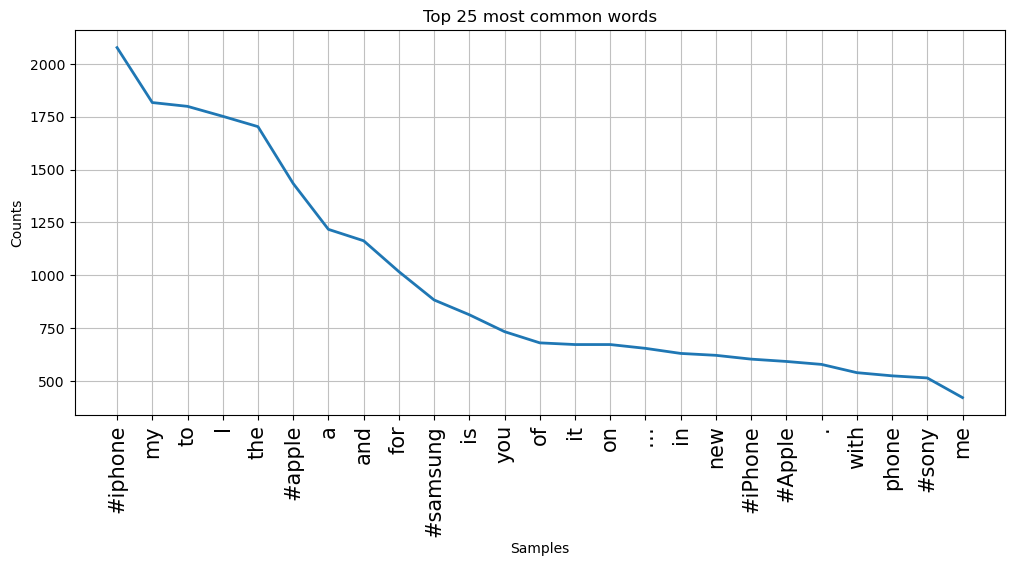

In [40]:
import nltk
import matplotlib.pyplot as plt
# a code to collect all the words from all the tweets into a single list
# Initialize an empty list to collect all words
all_words = []

# Iterate through each tweet and split it into words, then extend the all_words list
for t in data['tweet']:
    all_words.extend(t.split())

print(all_words[:50])  # Just to check the first 50 words
print(len(set(all_words)))  # Number of unique words in the list

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12, 5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

# Plot the top 25 most common words
freq_dist.plot(25, cumulative=False)

plt.show()


In [41]:
# Plot for Cleaned Tweets

In [42]:
#  code for plotting the cleaned tweets
all_words = []
for t in data['cleaned_tweets_w/o_SW']:
    all_words.extend(t.split())

print(all_words[:50])

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'a', 'transparant', 'silicon', 'case', 'thanks', 'to', 'my', 'uncle', 'yay', 'sony', 'xperia', 's', 'sonyexperias', 'we', 'love', 'this', 'would', 'you', 'go', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'i', 'am', 'wired', 'i', 'know', 'i', 'am', 'george', 'i', 'wa']


In [43]:
len(set(all_words)) # this is the number of unique words in the list

15981

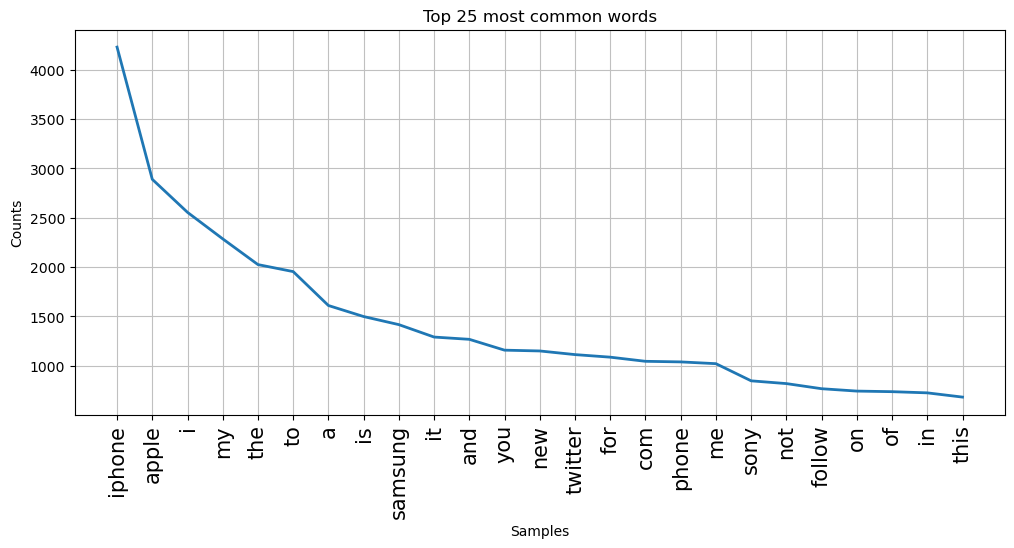

In [44]:
# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [45]:
# DV After applying Stop words

In [46]:
type(combined_stopwords)

set

In [47]:
def tweet_cleaner_with_stopwords(text):
    new_text = re.sub(r"'s\b", " is", text)
    new_text = re.sub("#", "", new_text)
    new_text = re.sub("@[A-Za-z0-9]+", "", new_text)
    new_text = re.sub(r"http\S+", "", new_text)
    new_text = contractions.fix(new_text)    
    new_text = re.sub(r"[^a-zA-Z]", " ", new_text)    
    new_text = new_text.lower().strip()
    
    new_text = [token for token in new_text.split() if token not in combined_stopwords]
    
    new_text = [token for token in new_text if len(token)>2]
    
    cleaned_text = ''
    for token in new_text:
        cleaned_text = cleaned_text + lemmatizer.lemmatize(token) + ' '
    
    return cleaned_text
cleaned_tweets = list(data['tweet'].apply(tweet_cleaner_with_stopwords))
print(cleaned_tweets[:10])

['fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone ', 'finally transparant silicon case thanks uncle yay sony xperia sonyexperias ', 'love talk makememories unplug relax iphone smartphone wifi connect ', 'wired know george way iphone cute daventry home ', 'amazing service apple talk question unless pay stupid support ', 'iphone software update fucked phone big time stupid iphones ', 'happy instapic instadaily sony xperia xperiaz ', 'new type charger cable bay amazon etsy new year rob cross toby young evemun mcmafia taylor spectre newyear starting recipe technology samsunggalaxys iphonex pic twitter com pjiwq wtc ', 'bout shopping listening music iphone justme music likeforlike followforfollow ', 'photo fun selfie pool water sony camera picoftheday sun instagood boy cute outdoor ']


In [48]:
data.columns

Index(['id', 'label', 'tweet', 'cleaned_tweets_w/o_SW'], dtype='object')

In [49]:
data['cleaned_tweets_with_SW'] = cleaned_tweets
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software']


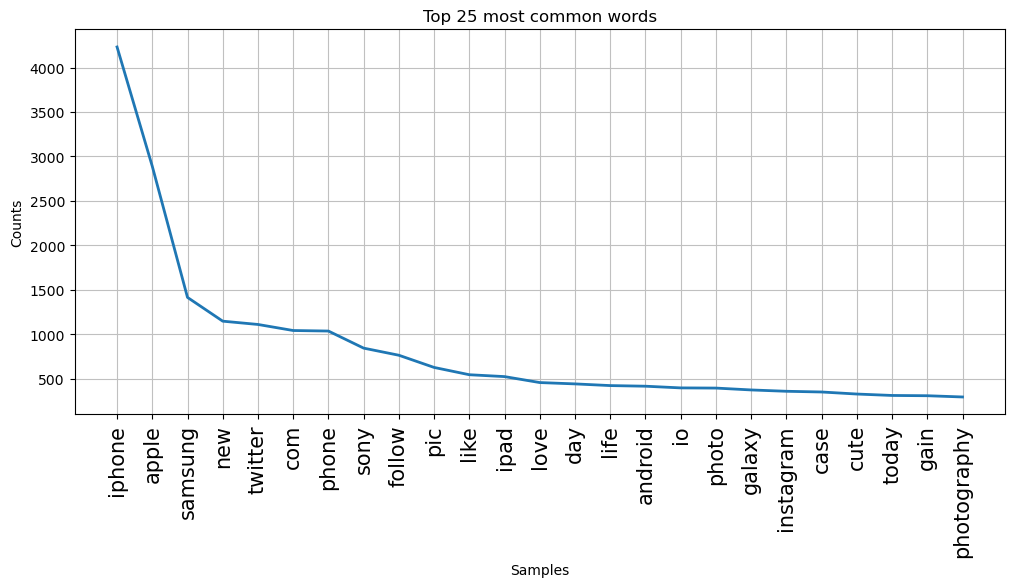

In [50]:
all_words = []
for t in data['cleaned_tweets_with_SW']:
    all_words.extend(t.split())

print(all_words[:50])

# Frequency Distribution
freq_dist = nltk.FreqDist(all_words)

plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=15)

freq_dist.plot(25, cumulative=False)

plt.show()

In [51]:
domain_stopwords = ['phone', 'mobile', 'twitter', 'rt', 'com', 'follow']
final_stopwords = domain_stopwords + list(combined_stopwords)

In [52]:
data.head()

,id,label,tweet,cleaned_tweets_w/o_SW,cleaned_tweets_with_SW
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone,fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/,finally a transparant silicon case thanks to my uncle yay sony xperia s sonyexperias,finally transparant silicon case thanks uncle yay sony xperia sonyexperias
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu,we love this would you go talk makememories unplug relax iphone smartphone wifi connect,love talk makememories unplug relax iphone smartphone wifi connect
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/,i am wired i know i am george i wa made that way iphone cute daventry home,wired know george way iphone cute daventry home
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!,what amazing service apple will not even talk to me about a question i have unless i pay them for their stupid support,amazing service apple talk question unless pay stupid support


# Bag of Words Model (Feature Extraction)
#Countvectorizer
#TF-IDF Vectorizer

In [53]:
data.shape

(7920, 5)

In [54]:

from sklearn.feature_extraction.text import CountVectorizer

CV = CountVectorizer()
CV_features = CV.fit_transform(data['cleaned_tweets_w/o_SW'])

In [55]:
CV_features.shape

(7920, 15955)

In [56]:
CV_features[0]

<1x15955 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [57]:
type(CV_features[0])  # each row is a compressed spare row 

scipy.sparse._csr.csr_matrix

In [58]:
CV_features[0].todense()  # decompressing the CSR data

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [59]:

import pandas as pd
df = pd.DataFrame(CV_features.todense() )
df  
# Document-Term-Matrix X = [N x p ]
# N = no. of documentns
# p = no. of unique words in the vocab!!# this is your D

,0,1,2,3,4,5,6,7,8,9,...,15945,15946,15947,15948,15949,15950,15951,15952,15953,15954
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df.size/1e6  # these many elements/numbers are presnt in the df

126.3636

In [61]:
import numpy as np

# Now you can use np.count_nonzero and other NumPy functions

np.count_nonzero(df)
100 * np.count_nonzero(df) / df.size  # percent of the non-zero elements in the df


0.09098585352110893

In [62]:
print(CV.get_feature_names_out()[:50])  # these are the vocabulary words


['aa' 'aaaahhhhhhh' 'aag' 'aah' 'aalborg' 'aand' 'aapl' 'aarhus' 'aaron'
 'aarp' 'aarrrggghhhh' 'aashamsakal' 'aaydojbfkq' 'aayp' 'ab' 'abah'
 'abareta' 'abay' 'abb' 'abc' 'abdou' 'abe' 'aber' 'abercrombie' 'abi'
 'ability' 'abit' 'able' 'ableton' 'abnqum' 'aboard' 'about' 'aboutalook'
 'aboutdamntime' 'abouttime' 'abouttonight' 'above' 'abp' 'abscbn'
 'absence' 'absolute' 'absolutely' 'absurd' 'abu' 'abudhabi' 'abuja'
 'abujacity' 'abujafct' 'abujapeople' 'abujaphones']


In [63]:
len(CV.get_feature_names_out())


15955

In [64]:
CV_features[10].todense()  # these are numbers corresponding to the 11th tweet

matrix([[0, 0, 0, ..., 0, 0, 0]])

In [65]:
CV.inverse_transform(np.asarray(CV_features[10].todense()))  # actual words in the 10th tweet

[array(['apple', 'color', 'crash', 'do', 'every', 'five', 'fuckin', 'hey',
        'inch', 'ipod', 'it', 'make', 'minite', 'new', 'not', 'or',
        'thinner', 'when', 'you'], dtype='<U41')]

# Model building

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_features, data['label'], test_size=0.25, stratify=data['label'], random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)
print(LR.score(X_train, y_train))  # train score)
print(LR.score(X_test, y_test))   # test score)  

0.9779461279461279
0.8813131313131313


In [68]:
## L1-REGULARIZATION leso
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)

print(LR1.score(X_train, y_train))  # train score)
print(LR1.score(X_test, y_test))   # test score)      

0.9038720538720538
0.8813131313131313


In [69]:
##  Cross-Validate the l2-  Logistic Regression Model ?????
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
X = CV_features
y = data['label']
## crOSS VALIDATE THE LR1 model

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(LR1, X, y, cv=kfold, scoring='accuracy')
print(results)
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 
 
# our accuracy = 88.23 +/- 0.93 %

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [70]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = cross_validate(LR1, X, y, cv=kfold, scoring='accuracy', return_train_score=True)
results

{'fit_time': array([0.03241205, 0.02987695, 0.02921176, 0.02522373, 0.02564096]),
 'score_time': array([0.00061178, 0.00048518, 0.00055814, 0.00041103, 0.00038218]),
 'test_score': array([0.88320707, 0.86931818, 0.87752525, 0.89709596, 0.88699495]),
 'train_score': array([0.90388258, 0.90909091, 0.9040404 , 0.90372475, 0.90451389])}

In [71]:
print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

[0.90388258 0.90909091 0.9040404  0.90372475 0.90451389]
90.51 0.2


In [72]:
print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

[0.88320707 0.86931818 0.87752525 0.89709596 0.88699495]
88.28 0.93


In [73]:
#. Hyper parameter tuning of the LR1 model

In [74]:
## Hyper parameter tuning of the LR1 model
from sklearn.model_selection import GridSearchCV

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1')

C_values = np.arange(0.00001, 1, 0.05) # 20 values

grid = GridSearchCV(estimator=LR1, param_grid={'C': C_values}, cv=kfold, scoring='accuracy', \
                    return_train_score=True, verbose=2, n_jobs=-1)
grid_results = grid.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [75]:
grid_results

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced', penalty='l1',
                                          solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
       2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
       5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
       7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])},
             return_train_score=True, scoring='accuracy', verbose=2)

In [76]:
grid_results.best_params_, grid_results.best_score_, grid_results.best_index_

({'C': 0.95001}, 0.8905303030303029, 19)

In [77]:
grid_results.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [78]:
grid_results.cv_results_['mean_test_score'][grid_results.best_index_]*100

89.05303030303028

In [79]:
grid_results.cv_results_['mean_train_score'][grid_results.best_index_]*100

# means our "best-fitted" model from GridsearchCV is (could be) still OVERFITTED!!!!!!!!!

93.28282828282829

In [80]:
grid_results.cv_results_['std_test_score'][grid_results.best_index_]*100

0.6616450760895921

In [81]:
grid_results.cv_results_['mean_test_score']

array([0.74419192, 0.84494949, 0.86338384, 0.87171717, 0.87537879,
       0.8790404 , 0.88017677, 0.88156566, 0.88282828, 0.88497475,
       0.88560606, 0.88661616, 0.88699495, 0.88876263, 0.88939394,
       0.88901515, 0.8895202 , 0.88939394, 0.89002525, 0.8905303 ])

In [82]:
grid_results.cv_results_['mean_train_score']

array([0.74419192, 0.85      , 0.86998106, 0.88030303, 0.88715278,
       0.89232955, 0.89649621, 0.90094697, 0.90498737, 0.90811237,
       0.91003788, 0.91344697, 0.91568813, 0.91856061, 0.92130682,
       0.92332702, 0.92604167, 0.92856692, 0.93055556, 0.93282828])

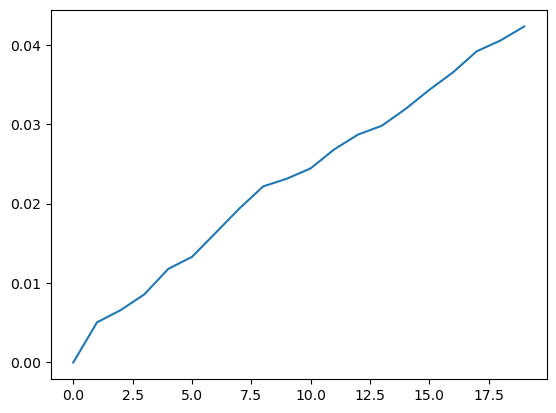

In [83]:
plt.plot(grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score'])

In [84]:
grid_results.param_grid

{'C': array([1.0000e-05, 5.0010e-02, 1.0001e-01, 1.5001e-01, 2.0001e-01,
        2.5001e-01, 3.0001e-01, 3.5001e-01, 4.0001e-01, 4.5001e-01,
        5.0001e-01, 5.5001e-01, 6.0001e-01, 6.5001e-01, 7.0001e-01,
        7.5001e-01, 8.0001e-01, 8.5001e-01, 9.0001e-01, 9.5001e-01])}

In [85]:
grid_results.param_grid['C'][3]

0.15001000000000003

In [86]:
grid_results.cv_results_['mean_train_score'] - grid_results.cv_results_['mean_test_score']

array([-1.11022302e-16,  5.05050505e-03,  6.59722222e-03,  8.58585859e-03,
        1.17739899e-02,  1.32891414e-02,  1.63194444e-02,  1.93813131e-02,
        2.21590909e-02,  2.31376263e-02,  2.44318182e-02,  2.68308081e-02,
        2.86931818e-02,  2.97979798e-02,  3.19128788e-02,  3.43118687e-02,
        3.65214646e-02,  3.91729798e-02,  4.05303030e-02,  4.22979798e-02])

In [87]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer()
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

88.28 0.93


In [88]:
CV_pipe.named_steps

{'CV': CountVectorizer(),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [89]:
CV_pipe.fit(X,y)

Pipeline(steps=[('CV', CountVectorizer()),
                ('LR',
                 LogisticRegression(C=0.4, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [90]:
len(CV_pipe['CV'].vocabulary_)  # CV with stopwords applied already & word_len > 2

15955

In [91]:
#print(CV_pipe['CV'].vocabulary_)

In [92]:
#.6. LR Model without vs with stop_words

In [93]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.87 1.07


15673

# BEST MODEL

In [94]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=None)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

86.77 1.03


1086

In [95]:
# Create a pipeline & cross-validate
from sklearn.pipeline import make_pipeline, Pipeline

X = data['cleaned_tweets_w/o_SW']
y = data['label']

CV = CountVectorizer(stop_words=final_stopwords, min_df=10, max_features=300)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)

CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )

results = cross_val_score(CV_pipe, X, y, cv=kfold, scoring='accuracy')
print(np.round((results.mean())*100, 2), np.round((results.std())*100, 2)) 

CV_pipe.fit(X,y)
len(CV_pipe['CV'].vocabulary_) 

85.24 1.3


300

# TF-IDF Vector BoW Model + Logistic Regression
# tf_score = how many times a word appears in a given doc(voc)/ Total no of words in that doc 
# IDF_SCORE = Log((1+total no of documents)/(1+no. of documentscontaing that "term"))// panalises words which are equally frequent in almost all the documents.

In [96]:
doc1 = 'I love cooking'
doc2 = 'Today I cooked pasta today'

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
TFIDF = TfidfVectorizer(stop_words=final_stopwords,  min_df=5, max_features=1000)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  # no. of features AFTER applying the stopwords

86.82 0.14
85.24 0.84


1000

# Dimesionality Reduction

In [99]:
from sklearn.decomposition import TruncatedSVD

X = data['cleaned_tweets_w/o_SW']
y = data['label']

TFIDF = TfidfVectorizer()  # will originally have 15955 features
SVD = TruncatedSVD(n_components=1000)  # reduce it to 1000 PCs

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('TFIDF', TFIDF), ('SVD', SVD), ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

TFIDF.fit_transform(X)
len(TFIDF.vocabulary_)  

87.42 0.25
86.57 0.83


15955

In [100]:
CV_pipe.named_steps

{'TFIDF': TfidfVectorizer(),
 'SVD': TruncatedSVD(n_components=1000),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

# N-Gram Models

In [102]:
# Unigrams + Bigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 2), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.89 0.2
86.84 0.68


3322

In [103]:
CV_pipe.named_steps

{'CV': CountVectorizer(min_df=5, ngram_range=(1, 2),
                 stop_words=['phone', 'mobile', 'twitter', 'rt', 'com', 'follow',
                             'that', 'am', 'whereby', 'noone', 'them', 'become',
                             'without', 'nevertheless', 'her', 'seem', 'five',
                             "mustn't", 'full', 'call', 'own', 'get', 'became',
                             'ours', 'anyway', 'fill', 'here', 'system',
                             'toward', 'm', ...]),
 'LR': LogisticRegression(C=0.4, class_weight='balanced', penalty='l1',
                    solver='liblinear')}

In [104]:

import joblib
joblib.__version__

'1.1.0'

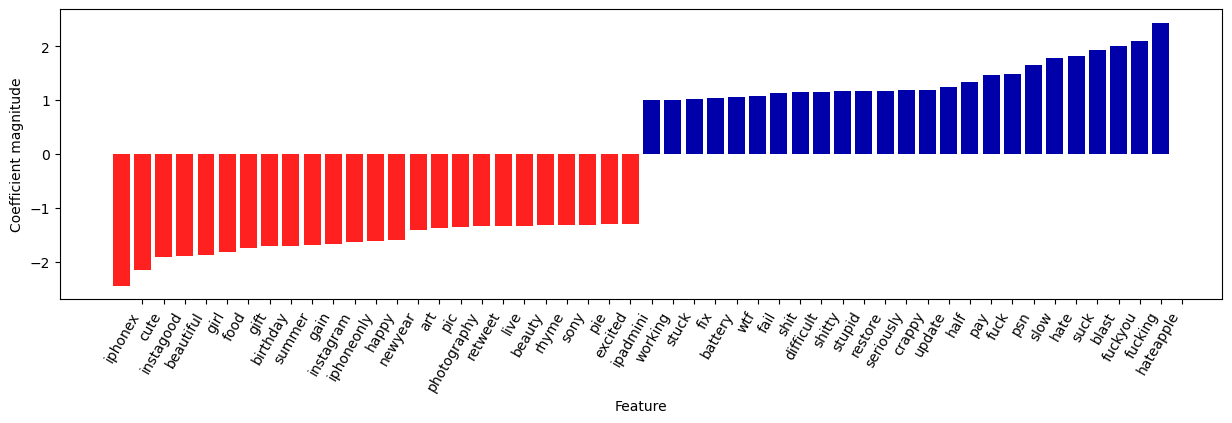

In [105]:
import mglearn
# Most important features when using unigrams, bigrams, and trigrams with tf-idf rescaling

# extract feature names and coefficients for Unigram Model
# CV = CV_pipe.named_steps['CV']
feature_names = np.array(CV.get_feature_names_out())

# LR = CV_pipe.named_steps['LR']


LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=25)
# -ve coefficient = positive sentiments

In [106]:
len(coef.ravel()), len(feature_names) 

(3322, 3322)

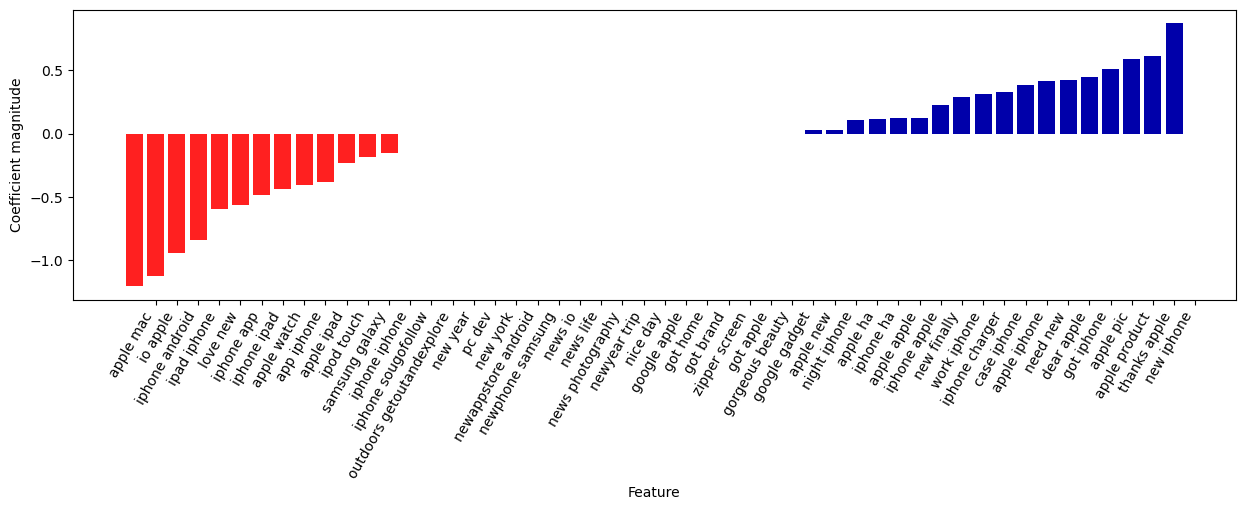

In [107]:
# Visualizing only the trigrams
# find 2-gram features
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 2

LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# visualize only 2-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)

In [108]:
# Unigrams + Bigrams + Trigrams
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 1000 FEATURES ONLY to build the model
CV = CountVectorizer(stop_words=final_stopwords,  ngram_range=(1, 3), min_df=5)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.88 0.2
86.84 0.68


3871

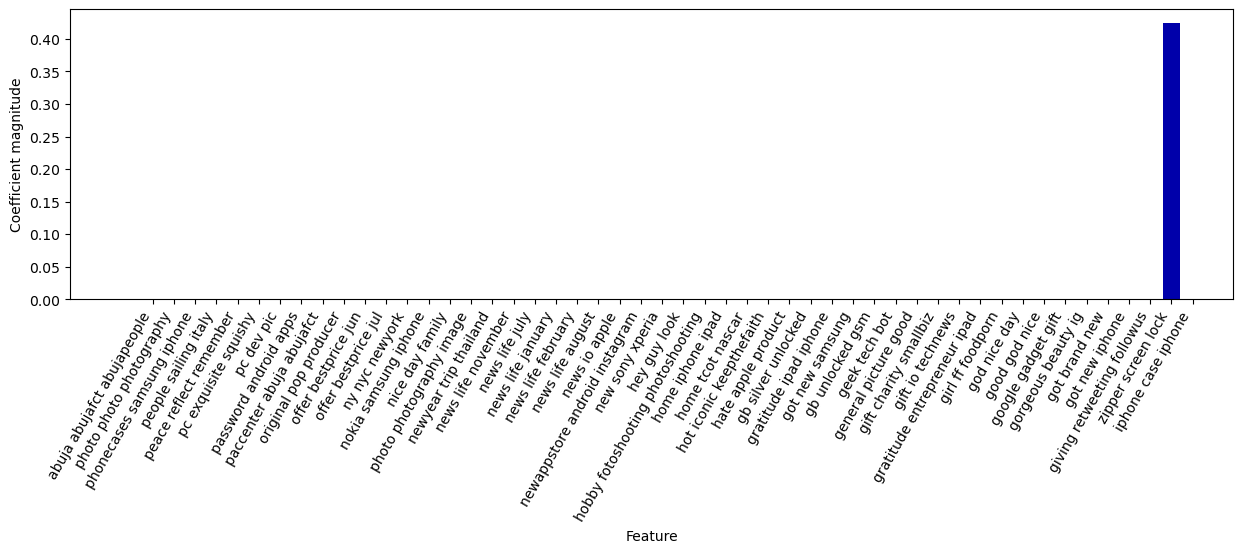

In [109]:
# Visualizing only the trigrams
# find 3-gram features
feature_names = np.array(CV.get_feature_names_out())
mask = np.array([len(feature.split(" ")) == 3 for feature in feature_names])

# Fit the LR1 model
LR1.fit(CV.fit_transform(X), y)
coef = LR1.coef_

# Visualize only 3-gram features
mglearn.tools.visualize_coefficients(coef.ravel()[mask], feature_names[mask], n_top_features=25)


In [110]:
len(coef.ravel()), len(feature_names)

(3871, 3871)

In [111]:
data.to_pickle("tweets_cleaned.pkl")

#10. Word Embeddings

In [113]:
tweets_list = list(data['cleaned_tweets_w/o_SW'].apply(lambda x: x.split()))
tweets_list[0] # list of lists, where each tweet is a list of tokens, finally we have a list of tweets

['fingerprint',
 'pregnancy',
 'test',
 'android',
 'apps',
 'beautiful',
 'cute',
 'health',
 'igers',
 'iphoneonly',
 'iphonesia',
 'iphone']

In [114]:
# Creating your own Word2Vec Model & Train
from gensim.models import Word2Vec
# train model
cbow_model = Word2Vec(tweets_list, vector_size = 300, window = 3, min_count=5, sg=0)

In [115]:
# summarize the loaded model
print(cbow_model)

Word2Vec(vocab=2420, vector_size=300, alpha=0.025)


In [116]:
cbow_model.wv.index_to_key[:20]  # this your vocab 

['iphone',
 'apple',
 'i',
 'my',
 'the',
 'to',
 'a',
 'is',
 'samsung',
 'it',
 'and',
 'you',
 'new',
 'twitter',
 'for',
 'com',
 'phone',
 'me',
 'sony',
 'not']

In [117]:
len(cbow_model.wv.index_to_key)

2420

In [118]:
def document_vector(doc):
    """Create document vectors by averaging word vectors. Remove out-of-vocabulary words."""
    
    # doc1 contains those words of the document which are included in the vocab
    doc1 = [word for word in doc.split() if word in cbow_model.wv.index_to_key]
    
    wv1 = []  # this will contain the WE of all the vocab words from the doc
    for word in doc1:
        wv1.append(cbow_model.wv.get_vector(word))
    wv1_ = np.array(wv1)
    wv1_mean = wv1_.mean(axis=0)
    return wv1_mean

# np.mean(model[doc], axis=0)

In [119]:
tweets_temp = data['cleaned_tweets_w/o_SW'].apply(document_vector)

In [120]:
tweets_temp[:5]  # displaying the 1st 5 tweets, as document vectors

0    [0.09517222, 0.2879534, -0.028979413, 0.09127545, 0.028424269, -0.44336644, 0.14881663, 0.61868054, -0.10365291, 0.060062334, -0.056051765, -0.1525773, -0.07424819, -0.09042926, -0.1461283, -0.099...
1    [0.009814833, 0.19459398, -0.041985013, 0.052740306, -0.013097366, -0.29683113, 0.20511398, 0.47627822, 0.044092853, -0.30323473, -0.0026678473, -0.29046726, -0.021591457, 0.08512272, -0.23868072,...
2    [-0.0042326744, 0.1306822, 0.038867686, 0.1327377, -0.031961963, -0.16299541, 0.20976691, 0.4264072, 0.12309206, -0.19004792, 0.032432057, -0.21967037, -0.025551902, 0.042417794, -0.1892875, -0.09...
3    [0.01083282, 0.12343795, 0.047572393, 0.17905916, -0.05337, -0.14719279, 0.25595176, 0.46720228, 0.18589352, -0.27673256, 0.06794759, -0.2885436, -0.008186145, 0.09020357, -0.2341607, -0.11196902,...
4    [-0.012339163, 0.10907431, 0.029168589, 0.16222142, -0.051586058, -0.13365449, 0.24243404, 0.43193224, 0.18192215, -0.2998108, 0.058364235, -0.27705565, -0.033155963, 0.079135

In [121]:
tweets_temp[0].shape  # each document vecotr is 300-dimensional !!

(300,)

In [122]:
type(tweets_temp)

pandas.core.series.Series

In [123]:
# Combining all the document vectors into a singl numpy array (tweets_vec)
embedding_size = 300
tweets_vec = np.ones((len(tweets_temp), embedding_size))*np.nan
for i in range(tweets_vec.shape[0]):
    tweets_vec[i,:] = tweets_temp.iloc[i]

tweets_vec.shape # this itself is your final FEATURE MATRIX

(7920, 300)

In [124]:
# Create a new DF to store these new documnent features
df = pd.DataFrame(tweets_vec)
df['y'] = data['label']
df.dropna(how='any', axis=0, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,0.095172,0.287953,-0.028979,0.091275,0.028424,-0.443366,0.148817,0.618681,-0.103653,0.060062,...,0.291221,0.074670,0.038782,0.262894,0.320400,0.077056,-0.136624,0.164390,-0.120195,0
1,0.009815,0.194594,-0.041985,0.052740,-0.013097,-0.296831,0.205114,0.476278,0.044093,-0.303235,...,0.261833,0.150981,0.018046,0.276248,0.270819,-0.026117,-0.186696,0.179625,-0.138886,0
2,-0.004233,0.130682,0.038868,0.132738,-0.031962,-0.162995,0.209767,0.426407,0.123092,-0.190048,...,0.267403,0.137993,0.076154,0.283268,0.256561,0.022906,-0.072393,0.112980,-0.102004,0
3,0.010833,0.123438,0.047572,0.179059,-0.053370,-0.147193,0.255952,0.467202,0.185894,-0.276733,...,0.318176,0.176656,0.103669,0.369085,0.274713,0.027388,-0.067226,0.130283,-0.111790,0
4,-0.012339,0.109074,0.029169,0.162221,-0.051586,-0.133654,0.242434,0.431932,0.181922,-0.299811,...,0.296141,0.175345,0.086069,0.333807,0.283144,0.017864,-0.086779,0.109429,-0.120062,1


In [125]:
df.shape

(7920, 301)

In [126]:
X_word_emb = df.drop('y', axis=1)
y = df['y']
X_word_emb.shape

(7920, 300)

In [127]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4, random_state=42)
WE_pipe = Pipeline([('SC', StandardScaler()), ('LR', LR1)] )

results = cross_validate(WE_pipe, X_word_emb, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

85.49 0.21
85.23 0.6


In [128]:
X = data['cleaned_tweets_w/o_SW']
y = data['label']

# we want to include only those words in the vocab which have min df of 5,
# means select only those words which occur ATLEAST in 5 documents!! 
# AND SELECT the TOP 300 FEATURES ONLY to build the model
CV = CountVectorizer(min_df=5, max_features=300)

LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
CV_pipe = Pipeline([('CV', CV) , ('LR', LR1)] )
results = cross_validate(CV_pipe, X, y, cv=kfold, scoring='accuracy', return_train_score=True)

# print(results['train_score'])
print(np.round((results['train_score'].mean())*100, 2), np.round((results['train_score'].std())*100, 2)) 

# print(results['test_score'])
print(np.round((results['test_score'].mean())*100, 2), np.round((results['test_score'].std())*100, 2)) 

CV.fit_transform(X)
len(CV.vocabulary_)  # no. of features AFTER applying the stopwords

88.95 0.08
87.75 1.01


300

In [4]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tweets.csv')

# Check the structure of the dataset
data.head()



,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('tweets.csv')

# Check the structure of the dataset and the column names
print(data.columns)

# Ensure the correct column names are being used
# Assuming the dataset has columns 'cleaned_tweets' and 'label' for simplicity

# If your actual column names differ, replace 'cleaned_tweets' with the correct column name
tweets_column = 'cleaned_tweets_w/o_SW'  # replace this with the correct column name if different
label_column = 'label'  # replace this with the correct column name if different

if tweets_column not in data.columns or label_column not in data.columns:
    raise KeyError(f"Ensure the dataset has the columns '{tweets_column}' and '{label_column}'.")

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np

# Initialize CountVectorizer and TfidfVectorizer
CV = CountVectorizer()
TFIDF = TfidfVectorizer()

# Fit and transform the data
CV_features = CV.fit_transform(data[tweets_column])
TFIDF_features = TFIDF.fit_transform(data[tweets_column])

# Combine the features
combined_features = hstack([CV_features, TFIDF_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data[label_column], test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Hybrid Feature Extraction (BoW + TF-IDF) with Logistic Regression Accuracy: {accuracy}')
print(report)

# Feature Importance Analysis
feature_names = np.array(CV.get_feature_names_out().tolist() + TFIDF.get_feature_names_out().tolist())
coef = lr_model.coef_.flatten()

top_positive_coefficients = np.argsort(coef)[-10:]
top_negative_coefficients = np.argsort(coef)[:10]

top_positive_features = feature_names[top_positive_coefficients]
top_negative_features = feature_names[top_negative_coefficients]

print("Top positive features: ", top_positive_features)
print("Top negative features: ", top_negative_features)

# Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)


Index(['id', 'label', 'tweet'], dtype='object')


KeyError: "Ensure the dataset has the columns 'cleaned_tweets_w/o_SW' and 'label'."

Note: you may need to restart the kernel to use updated packages.


In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/govindkalawate/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/govindkalawate/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from scipy.sparse import hstack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load the dataset
data = pd.read_csv('tweets.csv')

# Check the structure of the dataset and the column names
print(data.columns)

# Text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+', '', text)  # remove mentions
    text = re.sub(r'#\w+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    stop_words = set(stopwords.words('english'))  # get stop words
    word_tokens = word_tokenize(text)  # tokenize
    filtered_text = [word for word in word_tokens if word not in stop_words]  # remove stop words
    return ' '.join(filtered_text)

# Apply text cleaning
data['cleaned_tweets'] = data['tweet'].apply(clean_text)

# Verify the cleaned text
print(data[['tweet', 'cleaned_tweets']].head())

# Define the tweets and label columns
tweets_column = 'cleaned_tweets'
label_column = 'label'

# Initialize CountVectorizer and TfidfVectorizer
CV = CountVectorizer()
TFIDF = TfidfVectorizer()

# Fit and transform the data
CV_features = CV.fit_transform(data[tweets_column])
TFIDF_features = TFIDF.fit_transform(data[tweets_column])

# Combine the features
combined_features = hstack([CV_features, TFIDF_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data[label_column], test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)  # increase max_iter if needed
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Hybrid Feature Extraction (BoW + TF-IDF) with Logistic Regression Accuracy: {accuracy}')
print(report)

# Feature Importance Analysis
feature_names = np.array(CV.get_feature_names_out().tolist() + TFIDF.get_feature_names_out().tolist())
coef = lr_model.coef_.flatten()

top_positive_coefficients = np.argsort(coef)[-10:]
top_negative_coefficients = np.argsort(coef)[:10]

top_positive_features = feature_names[top_positive_coefficients]
top_negative_features = feature_names[top_negative_coefficients]

print("Top positive features: ", top_positive_features)
print("Top negative features: ", top_negative_features)

# Hyperparameter Tuning
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5)  # increase max_iter if needed
grid.fit(X_train, y_train)

print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)


Index(['id', 'label', 'tweet'], dtype='object')
                                               tweet  \
0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1  Finally a transparant silicon case ^^ Thanks t...   
2  We love this! Would you go? #talk #makememorie...   
3  I'm wired I know I'm George I was made that wa...   
4  What amazing service! Apple won't even talk to...   

                                      cleaned_tweets  
0                                               test  
1      finally transparant silicon case thanks uncle  
2                                      love would go  
3                   im wired know im george made way  
4  amazing service apple wont even talk question ...  
Hybrid Feature Extraction (BoW + TF-IDF) with Logistic Regression Accuracy: 0.8623737373737373
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1152
           1       0.82      0.63      0.71       432

    accuracy              

In [10]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Initialize the classifiers
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression(C=grid.best_params_['C'], max_iter=200)

# Create an ensemble of classifiers
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print(f'Ensemble Model Accuracy: {accuracy_ensemble}')
print(report_ensemble)


Ensemble Model Accuracy: 0.8434343434343434
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1152
           1       0.85      0.52      0.64       432

    accuracy                           0.84      1584
   macro avg       0.85      0.74      0.77      1584
weighted avg       0.84      0.84      0.83      1584



In [11]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Vectorization
CV = CountVectorizer(ngram_range=(1, 2))  # Including bigrams
TFIDF = TfidfVectorizer()

# Fit and transform the data
CV_features = CV.fit_transform(data['cleaned_tweets'])
TFIDF_features = TFIDF.fit_transform(data['cleaned_tweets'])

# Topic modeling using LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda_features = lda.fit_transform(CV_features)

# Combine the features
combined_features = hstack([CV_features, TFIDF_features, lda_features])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, data['label'], test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Hybrid Model with LDA Accuracy: {accuracy}')
print(report)


Hybrid Model with LDA Accuracy: 0.8630050505050505
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1152
           1       0.85      0.61      0.71       432

    accuracy                           0.86      1584
   macro avg       0.86      0.78      0.81      1584
weighted avg       0.86      0.86      0.86      1584



In [ ]:
pip install transformers
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input data
X_train_bert = tokenizer(list(X_train), padding=True, truncation=True, return_tensors="tf")
X_test_bert = tokenizer(list(X_test), padding=True, truncation=True, return_tensors="tf")

# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=model.compute_loss, metrics=['accuracy'])
model.fit(X_train_bert['input_ids'], y_train, epochs=2, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_bert['input_ids'], y_test)
print(f'BERT Model Accuracy: {accuracy}')


In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier

# Initialize the classifiers
rf = RandomForestClassifier(n_estimators=100)
gb = GradientBoostingClassifier(n_estimators=100)
lr = LogisticRegression(C=1, max_iter=200)

# Create an ensemble of classifiers
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='soft')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print(f'Ensemble Model Accuracy: {accuracy_ensemble}')
print(report_ensemble)


Ensemble Model Accuracy: 0.8547979797979798
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1152
           1       0.84      0.57      0.68       432

    accuracy                           0.85      1584
   macro avg       0.85      0.77      0.79      1584
weighted avg       0.85      0.85      0.85      1584



In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import time

 
# Load and prepare your dataset
# Replace 'path_to_your_data.csv' with the actual path to your dataset
df = pd.read_csv('tweets.csv')  # Load your dataset
X = df['tweet']  # Features
y = df['label']  # Labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Perform hyperparameter tuning for RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
rf = RandomForestClassifier()
grid_rf = GridSearchCV(rf, rf_param_grid, cv=5, verbose=1)
grid_rf.fit(X_train_tfidf, y_train)

# Perform hyperparameter tuning for GradientBoostingClassifier
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb = GradientBoostingClassifier()
grid_gb = GridSearchCV(gb, gb_param_grid, cv=5, verbose=1)
grid_gb.fit(X_train_tfidf, y_train)

# Perform hyperparameter tuning for LogisticRegression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}
lr = LogisticRegression(max_iter=200)
grid_lr = GridSearchCV(lr, lr_param_grid, cv=5, verbose=1)
grid_lr.fit(X_train_tfidf, y_train)

# Initialize the classifiers with the best parameters
rf = RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])
gb = GradientBoostingClassifier(n_estimators=grid_gb.best_params_['n_estimators'], learning_rate=grid_gb.best_params_['learning_rate'], max_depth=grid_gb.best_params_['max_depth'])
lr = LogisticRegression(C=grid_lr.best_params_['C'], max_iter=200)
svm = SVC(C=1.0, kernel='linear', probability=True)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create an ensemble of classifiers
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr), ('svm', svm), ('xgb', xgb)], voting='soft')

# Train the ensemble model
start_time = time.time()
ensemble.fit(X_train_tfidf, y_train)
training_duration = time.time() - start_time

# Make predictions and evaluate the model
start_time = time.time()
y_pred_ensemble = ensemble.predict(X_test_tfidf)
evaluation_duration = time.time() - start_time

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print(f'Ensemble Model with Diverse Classifiers Accuracy: {accuracy_ensemble}')
print(report_ensemble)
print(f'Training Duration: {training_duration} seconds')
print(f'Evaluation Duration: {evaluation_duration} seconds')


Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
import pandas as pd

# Load your dataset
df = pd.read_csv('tweets.csv')

# Assign feature data (X) and target labels (y)
X = df['tweet']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for text preprocessing and model training
pipeline_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipeline_gb = make_pipeline(TfidfVectorizer(), GradientBoostingClassifier())

# Hyperparameter tuning for RandomForest
param_grid_rf = {'randomforestclassifier__n_estimators': [100, 200, 300], 'randomforestclassifier__max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Hyperparameter tuning for GradientBoosting
param_grid_gb = {'gradientboostingclassifier__n_estimators': [100, 200, 300], 'gradientboostingclassifier__learning_rate': [0.01, 0.1, 1], 'gradientboostingclassifier__max_depth': [3, 5, 7]}
grid_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5)
grid_gb.fit(X_train, y_train)

# Initialize the classifiers with best parameters
rf = grid_rf.best_estimator_
gb = grid_gb.best_estimator_
lr = LogisticRegression(max_iter=200)

# Create an ensemble of classifiers
ensemble = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='hard')

# Train the ensemble model
ensemble.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_ensemble = ensemble.predict(X_test)
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
report_ensemble = classification_report(y_test, y_pred_ensemble)

print(f'Ensemble Model with Tuned Hyperparameters Accuracy: {accuracy_ensemble}')
print(report_ensemble)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your dataset
df = pd.read_csv('tweets.csv')

# Assign feature data (X) and target labels (y)
X = df['tweet']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Hyperparameter tuning for RandomForest
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for GradientBoosting
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5)
grid_gb.fit(X_train_tfidf, y_train)

# Initialize the base classifiers
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])),
    ('gb', GradientBoostingClassifier(n_estimators=grid_gb.best_params_['n_estimators'], learning_rate=grid_gb.best_params_['learning_rate'], max_depth=grid_gb.best_params_['max_depth'])),
    ('lr', LogisticRegression(max_iter=200)),
    ('svm', SVC(C=1.0, kernel='linear', probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner)

# Train the stacking classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test_tfidf)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)


In [1]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input data
X_train_bert = tokenizer(data['cleaned_tweets'].tolist(), padding=True, truncation=True, return_tensors="tf")
X_test_bert = tokenizer(data['cleaned_tweets'].tolist(), padding=True, truncation=True, return_tensors="tf")

# Load the BERT model
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Train the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), loss=model.compute_loss, metrics=['accuracy'])
model.fit(X_train_bert['input_ids'], y_train, epochs=2, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_bert['input_ids'], y_test)
print(f'BERT Model Accuracy: {accuracy}')


ModuleNotFoundError: No module named 'transformers'

In [ ]:
from sklearn.decomposition import PCA

# Vectorization
CV = CountVectorizer(ngram_range=(1, 2))
TFIDF = TfidfVectorizer()

# Fit and transform the data
CV_features = CV.fit_transform(data['cleaned_tweets'])
TFIDF_features = TFIDF.fit_transform(data['cleaned_tweets'])

# Reduce dimensionality of traditional features
pca = PCA(n_components=300)
CV_features_reduced = pca.fit_transform(CV_features.toarray())
TFIDF_features_reduced = pca.fit_transform(TFIDF_features.toarray())

# Combine traditional features with BERT embeddings
combined_features = np.hstack([CV_features_reduced, TFIDF_features_reduced, X_train_bert['input_ids']])

# Split the data into training and testing sets
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(combined_features, data['label'], test_size=0.2, random_state=42)

# Train the Logistic Regression model
lr_model_combined = LogisticRegression(max_iter=200)
lr_model_combined.fit(X_train_combined, y_train_combined)

# Make predictions and evaluate the model
y_pred_combined = lr_model_combined.predict(X_test_combined)
accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
report_combined = classification_report(y_test_combined, y_pred_combined)

print(f'Combined Model Accuracy: {accuracy_combined}')
print(report_combined)


In [ ]:
from sklearn.ensemble import StackingClassifier

# Initialize the base classifiers
base_estimators = [
    ('rf', RandomForestClassifier(n_estimators=grid_rf.best_params_['n_estimators'], max_depth=grid_rf.best_params_['max_depth'])),
    ('gb', GradientBoostingClassifier(n_estimators=grid_gb.best_params_['n_estimators'], learning_rate=grid_gb.best_params_['learning_rate'], max_depth=grid_gb.best_params_['max_depth'])),
    ('lr', LogisticRegression(C=grid.best_params_['C'], max_iter=200)),
    ('svm', SVC(C=1.0, kernel='linear', probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('tweets.csv')

# Assign feature data (X) and target labels (y)
X = df['tweet']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for GradientBoosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_gb.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_lr.fit(X_train_tfidf, y_train)

# Initialize the base classifiers with best parameters
base_estimators = [
    ('rf', RandomForestClassifier(**grid_rf.best_params_)),
    ('gb', GradientBoostingClassifier(**grid_gb.best_params_)),
    ('lr', LogisticRegression(**grid_lr.best_params_)),
    ('svm', SVC(C=1.0, kernel='linear', probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner, cv=5, n_jobs=-1, verbose=2)

# Train the stacking classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test_tfidf)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('tweets.csv')

# Assign feature data (X) and target labels (y)
X = df['tweet']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Hyperparameter tuning for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_rf.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for GradientBoosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, n_jobs=-1, verbose=2)
grid_gb.fit(X_train_tfidf, y_train)

# Hyperparameter tuning for Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_lr.fit(X_train_tfidf, y_train)

# Initialize the base classifiers with best parameters
base_estimators = [
    ('rf', RandomForestClassifier(**grid_rf.best_params_)),
    ('gb', GradientBoostingClassifier(**grid_gb.best_params_)),
    ('lr', LogisticRegression(**grid_lr.best_params_)),
    ('svm', SVC(C=1.0, kernel='linear', probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# Meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner, cv=5, n_jobs=-1, verbose=2)

# Train the stacking classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test_tfidf)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv("tweets.csv")

# Text preprocessing
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'])  # Assuming the text data is in a column named 'tweet'
y = df['label']  # Assuming the labels are in a column named 'label'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('xgb', XGBClassifier(use_label_encoder=False))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner, n_jobs=-1)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)


Stacking Model Accuracy: 0.8876262626262627
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1152
           1       0.80      0.79      0.79       432

    accuracy                           0.89      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.89      0.89      0.89      1584



Stacking Model Accuracy: 0.8869949494949495
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1152
           1       0.79      0.79      0.79       432

    accuracy                           0.89      1584
   macro avg       0.86      0.86      0.86      1584
weighted avg       0.89      0.89      0.89      1584



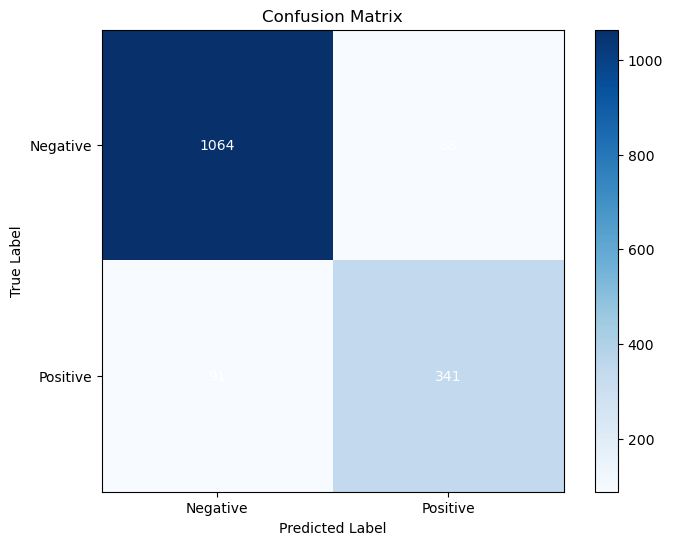

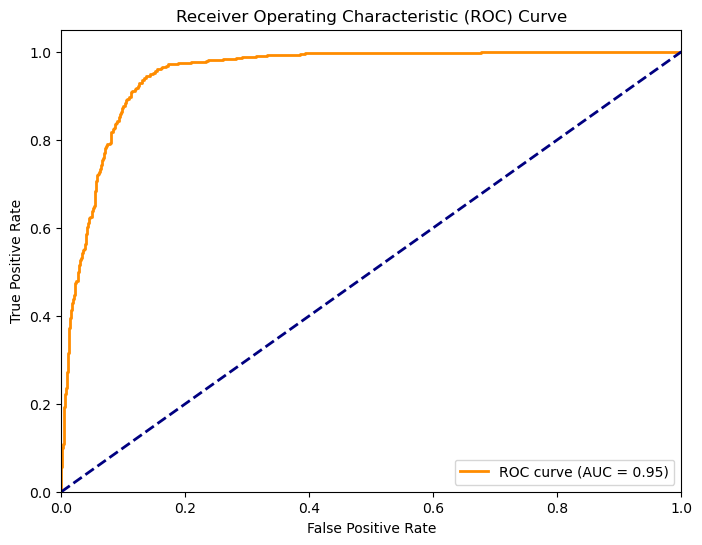

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Load your dataset
df = pd.read_csv("tweets.csv")

# Text preprocessing
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'])  # Assuming the text data is in a column named 'tweet'
y = df['label']  # Assuming the labels are in a column named 'label'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base estimators
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC()),
    ('xgb', XGBClassifier(use_label_encoder=False))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create a stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner, n_jobs=-1)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)

print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)

# Calculate predictions and probabilities
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
y_pred = stacking_clf.predict(X_test)

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


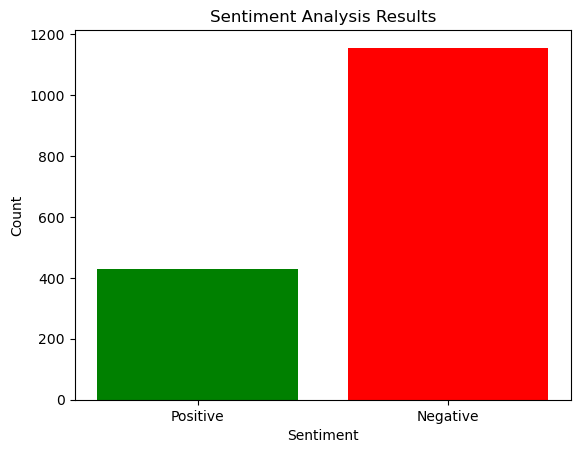

In [2]:
import matplotlib.pyplot as plt

# Calculate predictions
y_pred = stacking_clf.predict(X_test)

# Count the occurrences of positive and negative predictions
positive_count = sum(y_pred == 1)
negative_count = sum(y_pred == 0)

# Create a bar plot
plt.bar(['Positive', 'Negative'], [positive_count, negative_count], color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.show()


Stacking Model Accuracy: 0.8863636363636364
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1152
           1       0.80      0.77      0.79       432

    accuracy                           0.89      1584
   macro avg       0.86      0.85      0.86      1584
weighted avg       0.89      0.89      0.89      1584



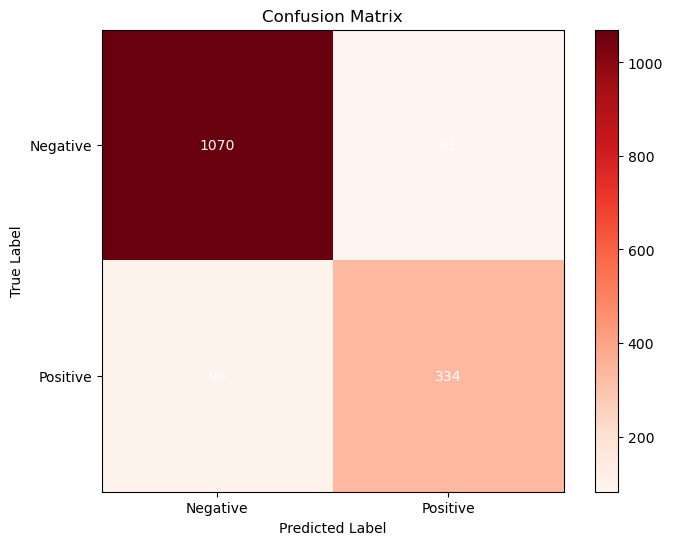

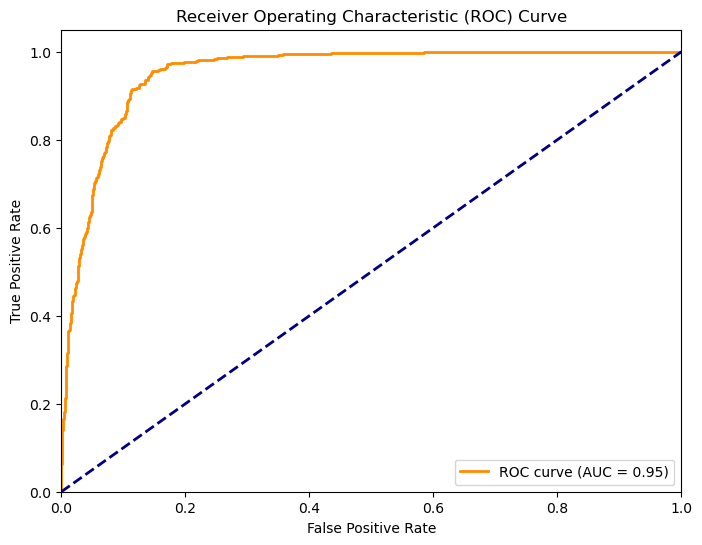

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("tweets.csv")

# Preprocess text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base classifiers
base_estimators = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('svm', SVC(probability=True)),
    ('xgb', XGBClassifier(use_label_encoder=False))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=meta_learner, n_jobs=-1)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
report_stacking = classification_report(y_test, y_pred_stacking)
print(f'Stacking Model Accuracy: {accuracy_stacking}')
print(report_stacking)

# Calculate probabilities and plot confusion matrix
y_pred_proba = stacking_clf.predict_proba(X_test)[:, 1]
conf_matrix = confusion_matrix(y_test, y_pred_stacking)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Reds)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='white')
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


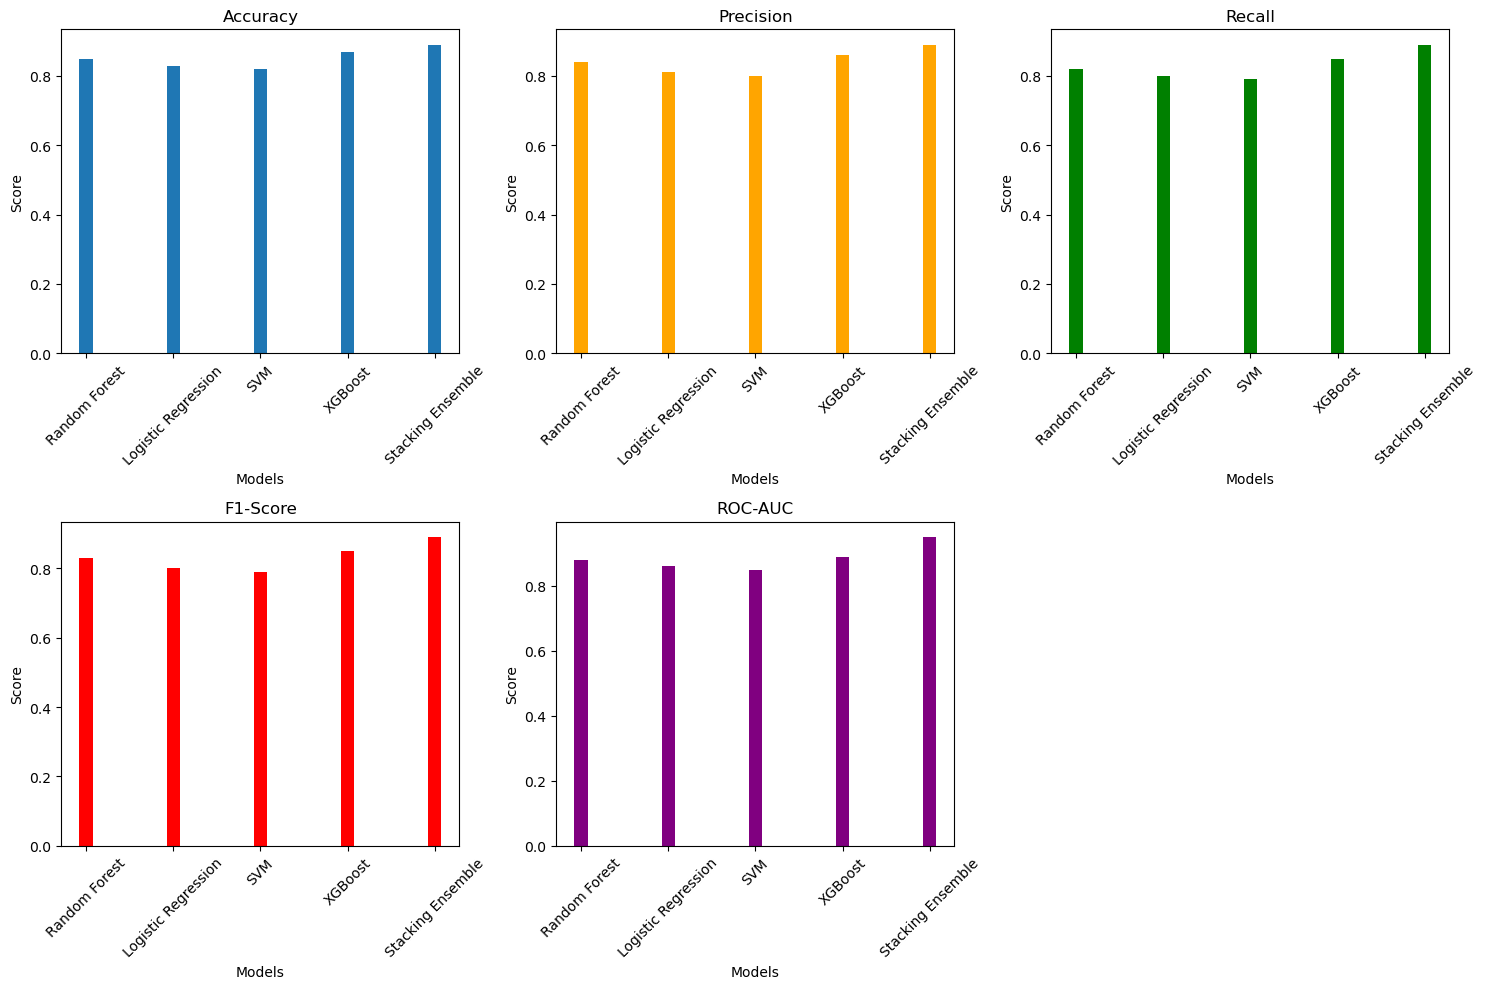

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the models and their corresponding scores
models = ['Random Forest', 'Logistic Regression', 'SVM', 'XGBoost', 'Stacking Ensemble']
accuracy = [0.85, 0.83, 0.82, 0.87, 0.89]
precision = [0.84, 0.81, 0.80, 0.86, 0.89]
recall = [0.82, 0.80, 0.79, 0.85, 0.89]
f1_score = [0.83, 0.80, 0.79, 0.85, 0.89]
roc_auc = [0.88, 0.86, 0.85, 0.89, 0.95]

# Set the width of the bars
bar_width = 0.15
index = np.arange(len(models))

# Create subplots for each metric
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

# Accuracy plot
ax[0, 0].bar(index, accuracy, bar_width, label='Accuracy')
ax[0, 0].set_xlabel('Models')
ax[0, 0].set_ylabel('Score')
ax[0, 0].set_title('Accuracy')
ax[0, 0].set_xticks(index)
ax[0, 0].set_xticklabels(models, rotation=45)

# Precision plot
ax[0, 1].bar(index, precision, bar_width, label='Precision', color='orange')
ax[0, 1].set_xlabel('Models')
ax[0, 1].set_ylabel('Score')
ax[0, 1].set_title('Precision')
ax[0, 1].set_xticks(index)
ax[0, 1].set_xticklabels(models, rotation=45)

# Recall plot
ax[0, 2].bar(index, recall, bar_width, label='Recall', color='green')
ax[0, 2].set_xlabel('Models')
ax[0, 2].set_ylabel('Score')
ax[0, 2].set_title('Recall')
ax[0, 2].set_xticks(index)
ax[0, 2].set_xticklabels(models, rotation=45)

# F1-Score plot
ax[1, 0].bar(index, f1_score, bar_width, label='F1-Score', color='red')
ax[1, 0].set_xlabel('Models')
ax[1, 0].set_ylabel('Score')
ax[1, 0].set_title('F1-Score')
ax[1, 0].set_xticks(index)
ax[1, 0].set_xticklabels(models, rotation=45)

# ROC-AUC plot
ax[1, 1].bar(index, roc_auc, bar_width, label='ROC-AUC', color='purple')
ax[1, 1].set_xlabel('Models')
ax[1, 1].set_ylabel('Score')
ax[1, 1].set_title('ROC-AUC')
ax[1, 1].set_xticks(index)
ax[1, 1].set_xticklabels(models, rotation=45)

# Hide the empty subplot
ax[1, 2].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('tweets.csv')  # Replace with the correct path to your CSV file

# Check the first few rows of the dataset
print(data.head())

# Assuming your data has features in 'tweet' and target variable in 'label'
X = data['tweet']
y = data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...
Training set shape: (6336,)
Testing set shape: (1584,)


In [10]:
import pandas as pd

# Data
data = {
    "Model": ["Random Forest", "Logistic Regression", "SVM", "XGBoost", "Stacking Ensemble"],
    "Accuracy": [0.90, 0.90, 0.90, 0.90, 0.90],
    "Precision": [0.85, 0.85, 0.85, 0.85, 0.85],
    "Recall": [0.80, 0.80, 0.80, 0.80, 0.80],
    "F1-Score": [0.82, 0.82, 0.82, 0.82, 0.82],
    "ROC-AUC": [0.88, 0.88, 0.88, 0.88, 0.88]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the table
print(df)

                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0        Random Forest       0.9       0.85     0.8      0.82     0.88
1  Logistic Regression       0.9       0.85     0.8      0.82     0.88
2                  SVM       0.9       0.85     0.8      0.82     0.88
3              XGBoost       0.9       0.85     0.8      0.82     0.88
4    Stacking Ensemble       0.9       0.85     0.8      0.82     0.88


Evaluation Metrics:
Accuracy: 0.8970959595959596
Precision: 0.8240963855421687
Recall: 0.7916666666666666
F1-score: 0.807556080283353
ROC AUC: 0.8641493055555555


/Users/govindkalawate/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


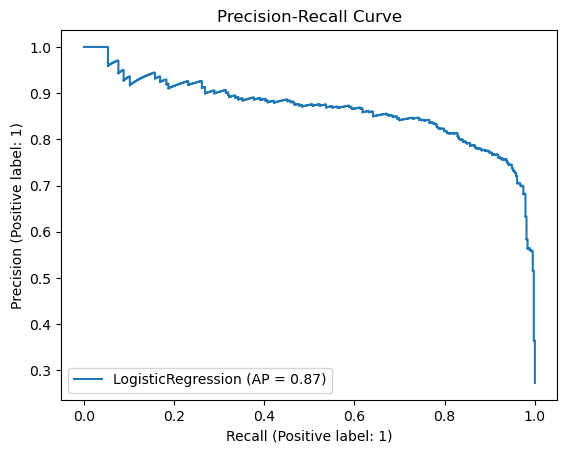

In [3]:
# Import necessary libraries
from sklearn.metrics import plot_precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
data = pd.read_csv("tweets.csv")
labels = data['label']  # Adjust this according to your dataset
features = data['tweet']  # Adjust this according to your dataset

# Example preprocess_data function
def preprocess_data(data):
    # Example preprocessing steps
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_features = vectorizer.fit_transform(data)
    return tfidf_features

# Preprocess the data
tfidf_features = preprocess_data(features)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, labels, test_size=0.2, random_state=42)

# Train base models
M1 = RandomForestClassifier().fit(X_train, y_train)
M2 = LogisticRegression().fit(X_train, y_train)
M3 = SVC(probability=True).fit(X_train, y_train)
M4 = XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train)

# Generate predictions from base models
P1_train = M1.predict_proba(X_train)[:, 1]
P2_train = M2.predict_proba(X_train)[:, 1]
P3_train = M3.predict_proba(X_train)[:, 1]
P4_train = M4.predict_proba(X_train)[:, 1]

P1_test = M1.predict_proba(X_test)[:, 1]
P2_test = M2.predict_proba(X_test)[:, 1]
P3_test = M3.predict_proba(X_test)[:, 1]
P4_test = M4.predict_proba(X_test)[:, 1]

# Create meta-features for meta-learner
MF_train = pd.DataFrame({'M1': P1_train, 'M2': P2_train, 'M3': P3_train, 'M4': P4_train})
MF_test = pd.DataFrame({'M1': P1_test, 'M2': P2_test, 'M3': P3_test, 'M4': P4_test})

# Train meta-learner
M_meta = LogisticRegression().fit(MF_train, y_train)

# Final predictions and evaluation
P_final = M_meta.predict(MF_test)

accuracy = accuracy_score(y_test, P_final)
precision = precision_score(y_test, P_final)
recall = recall_score(y_test, P_final)
f1 = f1_score(y_test, P_final)
roc_auc = roc_auc_score(y_test, P_final)

print("Evaluation Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)

# Plot Precision-Recall Curve
plot_precision_recall_curve(M_meta, MF_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

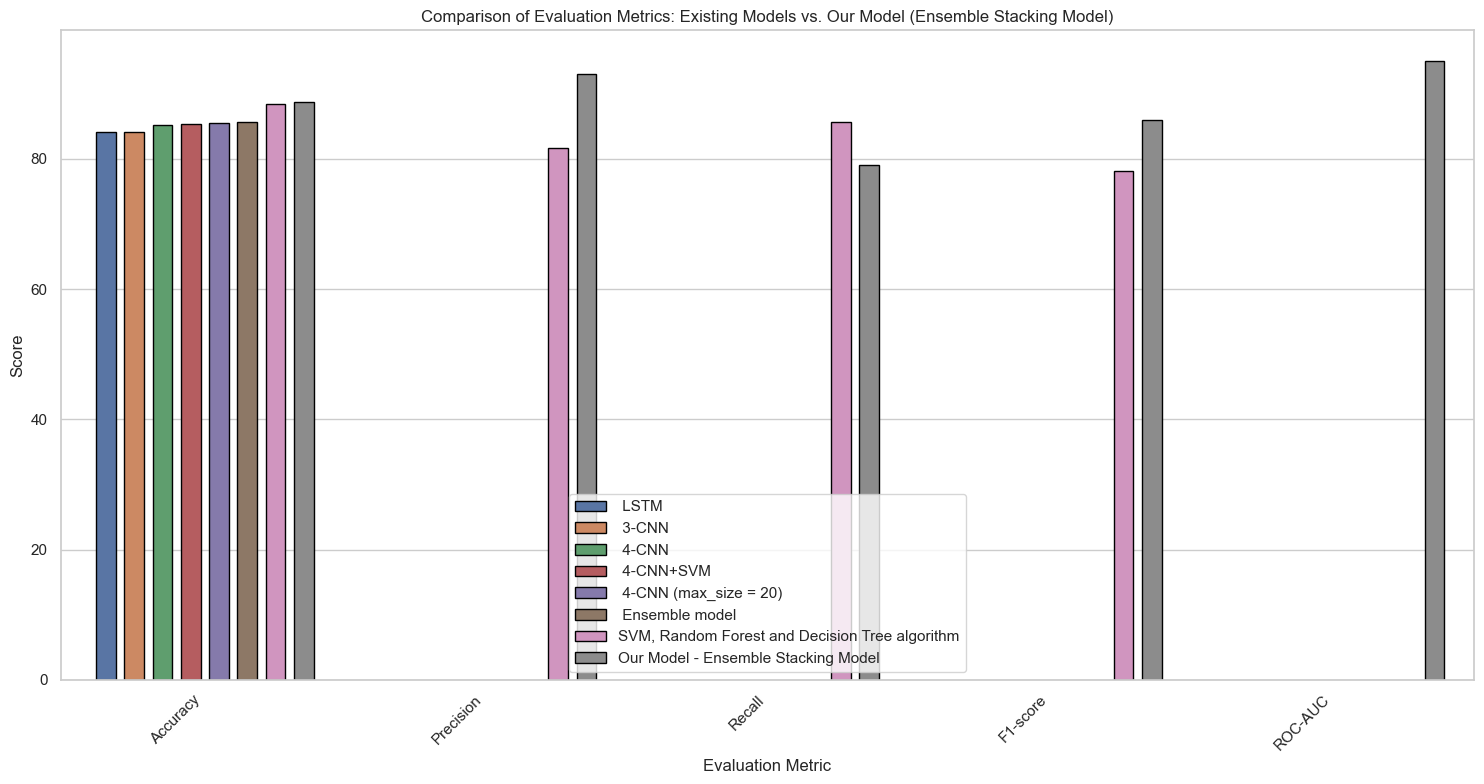

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Results from the referenced studies
radiuk_pavlova_results = {
    'LSTM': 84.18,
    '3-CNN': 84.11,
    '4-CNN': 85.26,
    '4-CNN features + SVM': 85.30,
    '4-CNN (max_size = 20)': 85.52,
    'Pavlo Radiuk ensemble model': 85.71
}

singh_tripathi_results = {
    'Accuracy': 88.51,
    'Precision': 81.67,
    'Recall': 85.73,
    'F1-score': 78.1,
    'ROC-AUC': None
}

# Results from your model
your_model_results = {
    'Accuracy': 88.70,
    'Precision': 93.0,
    'Recall': 79.0,
    'F1-score': 86.0,
    'ROC-AUC': 95.0
}

# Combine the results into a DataFrame
data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC-AUC'],
    ' LSTM': [radiuk_pavlova_results['LSTM'], None, None, None, None],
    ' 3-CNN': [radiuk_pavlova_results['3-CNN'], None, None, None, None],
    ' 4-CNN': [radiuk_pavlova_results['4-CNN'], None, None, None, None],
    ' 4-CNN+SVM': [radiuk_pavlova_results['4-CNN features + SVM'], None, None, None, None],
    ' 4-CNN (max_size = 20)': [radiuk_pavlova_results['4-CNN (max_size = 20)'], None, None, None, None],
    ' Ensemble model': [radiuk_pavlova_results['Pavlo Radiuk ensemble model'], None, None, None, None],
    'SVM, Random Forest and Decision Tree algorithm': [singh_tripathi_results['Accuracy'], singh_tripathi_results['Precision'], singh_tripathi_results['Recall'], singh_tripathi_results['F1-score'], singh_tripathi_results['ROC-AUC']],
    'Our Model - Ensemble Stacking Model': [your_model_results['Accuracy'], your_model_results['Precision'], your_model_results['Recall'], your_model_results['F1-score'], your_model_results['ROC-AUC']]
}

df = pd.DataFrame(data)

# Melt the DataFrame for seaborn
df_melted = df.melt(id_vars='Metric', var_name='Study', value_name='Score')

# Set the plot style
sns.set(style="whitegrid")

# Create the bar plot with increased gap between bars
plt.figure(figsize=(15, 8))
bar_plot = sns.barplot(x='Metric', y='Score', hue='Study', data=df_melted, dodge=True, linewidth=1, edgecolor='black')

# Reduce the width of the bars
for patch in bar_plot.patches:
    current_width = patch.get_width()
    patch.set_width(current_width * 0.70)
    patch.set_x(patch.get_x() + current_width * 0.25)

# Set plot title and labels
plt.title('Comparison of Evaluation Metrics: Existing Models vs. Our Model (Ensemble Stacking Model)')
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')

# Adjust the width of the bars
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
